### Harris Corner Detection
We will understand the concepts behind Harris Corner Detection.

We will see the following functions: cv.cornerHarris(), cv.cornerSubPix()

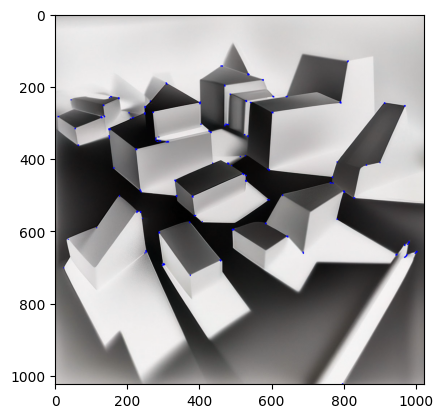

In [18]:
from matplotlib import pyplot as plt
import numpy as np
import cv2 as cv
filename = 'figures.png'
img = cv.imread(filename)
img = cv.bitwise_not(img)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,3,0.04)
#result is dilated for marking the corners, not important
dst = cv.dilate(dst,None)
# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.001*dst.max()]=[0,0,255]
plt.imshow(img)
plt.show()

Corner with SubPixel Accuracy

 OpenCV comes with a function cv.cornerSubPix() which further refines the corners detected with sub-pixel accuracy.

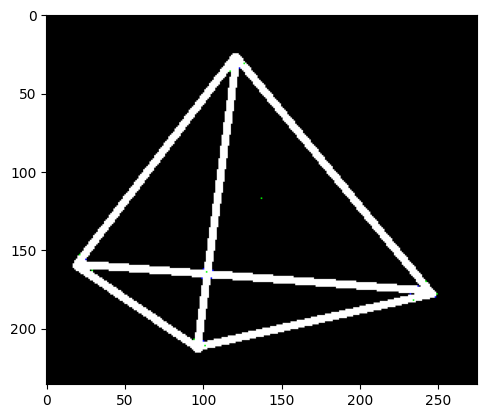

In [51]:
import numpy as np
import cv2 as cv
filename = 'micro_img.png'
img = cv.imread(filename)
img = cv.bitwise_not(img)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
# find Harris corners
gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,3,0.04)
dst = cv.dilate(dst,None)
ret, dst = cv.threshold(dst,0.1*dst.max(),255,0)
dst = np.uint8(dst)
# find centroids
ret, labels, stats, centroids = cv.connectedComponentsWithStats(dst)
# define the criteria to stop and refine the corners
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.1)
corners = cv.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)
# Now draw them
res = np.hstack((centroids,corners))
res = np.int64(res)
img[res[:,1],res[:,0]]=[0,0,255]
img[res[:,3],res[:,2]] = [0,255,0]
plt.imshow(img)
plt.show()

### Shi-Tomasi Corner Detector & Good Features to Track
We will learn about the another corner detector: Shi-Tomasi Corner Detector

We will see the function: cv.goodFeaturesToTrack()

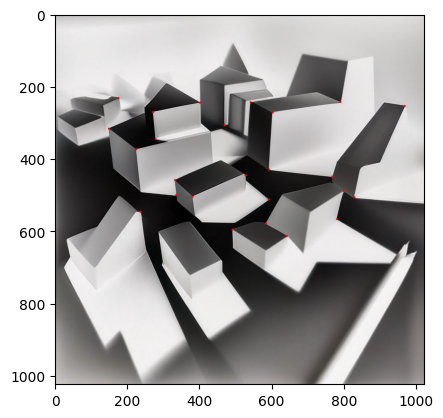

(<matplotlib.image.AxesImage at 0x1844886e750>, None)

In [50]:
# OpenCV has a function, cv.goodFeaturesToTrack(). It finds N strongest corners in the image by Shi-Tomasi method

import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('figures.png')
img = cv.bitwise_not(img)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
corners = cv.goodFeaturesToTrack(gray,25,0.01,10)
corners = np.int64(corners)
for i in corners:
    x,y = i.ravel()
    cv.circle(img,(x,y),3,255,-1)
plt.imshow(img),plt.show()

This function is more appropriate for tracking. We will see that when its time comes.